# Практика: pandas та matplotlib
---
У цьому ноутбуці зібрані завдання для практики роботи з бібліотеками **pandas** та **matplotlib**.

Спочатку виконай імпорт потрібних бібліотек, а потім рухайся по розділах.

In [33]:
# Імпорт основних бібліотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Розділ 1. Основи pandas: створення та перегляд даних
**Мета:** навчитися створювати `DataFrame`, переглядати структуру та базову інформацію.

**Завдання 1–10:**
1. Імпортуй бібліотеки `pandas` і `numpy` (вже зроблено вище, але спробуй сам у новій комірці). +
2. Створи простий DataFrame з трьох стовпців: `"Name"`, `"Age"`, `"City"` (5–7 рядків). +
3. Виведи перші 5 рядків DataFrame. +
4. Виведи інформацію про типи даних (`.info()`) і статистику (`.describe()`). +
5. Виведи назви всіх стовпців і індексів.
6. Зміни порядок стовпців у DataFrame.
7. Встанови стовпець `"Name"` як індекс.
8. Перейменуй стовпець `"City"` на `"Hometown"`.
9. Зроби копію DataFrame і додай новий стовпець `"Country"` зі значенням `"Ukraine"`.
10. Виведи тільки стовпці `"Name"` та `"Age"`.

In [34]:
df = pd.DataFrame({
    "Name" : ["Alice", "Bob", "Charlie", "David", "Mark"],
    "Age" : [24, 30, 22, 35, 28],
    "City" : ["New York", "Los Angeles", "Chicago", "Houston", "Phoenix"]
})
df.head(2)

,Name,Age,City
0,Alice,24,New York
1,Bob,30,Los Angeles


In [35]:
df.tail(2)

,Name,Age,City
3,David,35,Houston
4,Mark,28,Phoenix


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    5 non-null      object
 1   Age     5 non-null      int64 
 2   City    5 non-null      object
dtypes: int64(1), object(2)
memory usage: 252.0+ bytes


In [37]:
df.describe()

,Age
count,5.000000
mean,27.800000
std,5.118594
min,22.000000
25%,24.000000
50%,28.000000
75%,30.000000
max,35.000000


In [38]:
# 5. Виведи назви всіх стовпців і індексів.
# 6. Зміни порядок стовпців у DataFrame.
print(df.columns)
print(df.index)
df = df[["City", "Name", "Age"]]
print(df)


Index(['Name', 'Age', 'City'], dtype='object')
RangeIndex(start=0, stop=5, step=1)
          City     Name  Age
0     New York    Alice   24
1  Los Angeles      Bob   30
2      Chicago  Charlie   22
3      Houston    David   35
4      Phoenix     Mark   28


In [39]:
# 7. Встанови стовпець `"Name"` як індекс.
df_idexed = df.set_index("Name")
df_idexed

,City,Age
Name,,
Alice,New York,24
Bob,Los Angeles,30
Charlie,Chicago,22
David,Houston,35
Mark,Phoenix,28


In [40]:
# 8. Перейменуй стовпець `"City"` на `"Hometown"`.
df = df.rename(columns={"City": "Hometown"})
df.head()

,Hometown,Name,Age
0,New York,Alice,24
1,Los Angeles,Bob,30
2,Chicago,Charlie,22
3,Houston,David,35
4,Phoenix,Mark,28


In [41]:
# 9. Додай новий стовпець `"Country"` зі значенням `"USA"`.
df["Country"] = ["USA", "USA", "Canada", "USA", "USA"]
df

,Hometown,Name,Age,Country
0,New York,Alice,24,USA
1,Los Angeles,Bob,30,USA
2,Chicago,Charlie,22,Canada
3,Houston,David,35,USA
4,Phoenix,Mark,28,USA


In [42]:
# 10. Виведи тільки стовпці `"Name"` та `"Age"`.
df[["Name", "Age"]]

,Name,Age
0,Alice,24
1,Bob,30
2,Charlie,22
3,David,35
4,Mark,28


## Розділ 2. Фільтрація та сортування
**Мета:** навчитися відбирати рядки за умовами, сортувати дані, працювати з індексами.

**Завдання 11–20:** (використовуй DataFrame з попереднього розділу або створи новий)
11. Вибери всі рядки, де `"Age" > 25`.   
12. Вибери всі рядки, де `"City"` (або `"Hometown"`) дорівнює `"Kyiv"`.  
13. Вибери рядки, де `"Age"` між 20 і 30 включно.  
14. Відсортуй таблицю за віком у порядку спадання.  
15. Відсортуй за двома стовпцями — спочатку `"City"`, потім `"Age"`.  
16. Перевір, чи є дублікати в `"Name"` і видали їх.  
17. Відфільтруй усіх користувачів, які **не** з Києва.  
18. Вибери випадкові 3 рядки з DataFrame (`.sample(3)`).  
19. Переміскай усі рядки DataFrame (за допомогою `.sample(frac=1)`).  
20. Додай новий рядок до DataFrame з вигаданими даними.  

In [44]:
# 11. Вибери всі рядки, де `"Age" > 25`.   
# 12. Вибери всі рядки, де `"City"` (або `"Hometown"`) дорівнює `"Kyiv"`.  
# 13. Вибери рядки, де `"Age"` між 20 і 30 включно.
print(df[df["Age"] > 25])
print(df[df["Hometown"] == "Chicago"])
print(df[(df["Age"] >= 20) & (df["Age"] <= 30)])


      Hometown   Name  Age Country
1  Los Angeles    Bob   30     USA
3      Houston  David   35     USA
4      Phoenix   Mark   28     USA
  Hometown     Name  Age Country
2  Chicago  Charlie   22  Canada
      Hometown     Name  Age Country
0     New York    Alice   24     USA
1  Los Angeles      Bob   30     USA
2      Chicago  Charlie   22  Canada
4      Phoenix     Mark   28     USA


## Розділ 3. Робота з відсутніми значеннями (NaN)
**Мета:** навчитися виявляти, замінювати та видаляти пропущені значення.

**Завдання 21–26:**
21. Створи DataFrame з кількома пропущеними значеннями (`NaN`) у числових і текстових стовпцях.  
22. Замінити всі `NaN` у текстових стовпцях на `"Unknown"`.  
23. Замінити `NaN` у числових стовпцях на середнє значення відповідного стовпця.  
24. Видалити всі рядки, де хоча б одне значення пропущене.  
25. Перевір кількість пропущених значень у кожному стовпці (`.isna().sum()`).  
26. Створи DataFrame з числовими і текстовими стовпцями та перевір `.dtypes`.  

In [21]:
# Розв'язання для завдань 21–26
# Підказка: використовуй np.nan для створення пропусків.

# Твій код тут ↓

## Розділ 4. Групування, агрегація, статистика
**Мета:** навчитися використовувати `groupby`, агрегації, зведені таблиці.

**Завдання 27–35:**
27. Створи DataFrame про продажі з колонками: `"Product"`, `"Category"`, `"Price"`, `"Quantity"` (10–15 рядків).  
28. Знайди загальний дохід (`Price * Quantity`) і додай його як новий стовпець `"Revenue"`.  
29. Порахуйте загальний дохід для кожної категорії (`groupby("Category")["Revenue"].sum()`).  
30. Знайди середню ціну по кожному `"Product"`.  
31. Визнач найпопулярніший товар (за сумарною кількістю продажів).  
32. Знайди мінімальний і максимальний дохід по категорії.  
33. Зроби зведену таблицю (`pivot_table`) з категоріями по рядках і середнім доходом по стовпцях.  
34. Відсортуй категорії за середнім доходом.  
35. Додай стовпець `"Profit" = "Revenue" * 0.25` і знайди середній прибуток по категоріях.  

In [22]:
# Розв'язання для завдань 27–35
# Підказка: можеш згенерувати випадкові дані за допомогою np.random.

# Твій код тут ↓

## Розділ 5. Злиття, об’єднання та збереження даних
**Мета:** навчитися з'єднувати таблиці, знаходити відсутні зв'язки, зберігати дані в CSV.

**Завдання 36–40:**
36. Створи два DataFrame: `customers` і `orders`:
   - `customers`: `CustomerID`, `Name`, `City`  
   - `orders`: `OrderID`, `CustomerID`, `Amount`  
   З’єднай їх за `CustomerID` (`pd.merge`).  
37. Об’єднай дві таблиці вертикально (`pd.concat`).  
38. Знайди клієнтів, які **не мають** замовлень (left join + `NaN` у `"Amount"`).  
39. Збережи результат у CSV-файл (`.to_csv("customers_orders.csv", index=False)`) і потім зчитай його назад (`pd.read_csv`).  
40. Перевір, чи зчитані типи даних збігаються з оригіналом (порівняй `.dtypes`).  

In [23]:
# Розв'язання для завдань 36–40
# Твій код тут ↓

## Розділ 6. Робота з датами і часом
**Мета:** навчитися працювати з датами, витягати компоненти дати, фільтрувати за часом.

**Завдання 41–45:**
41. Створи DataFrame з колонкою `"date"` від `"2024-01-01"` до `"2024-01-10"` (використай `pd.date_range`).  
42. Додай новий стовпець `"day_of_week"`, що показує день тижня.  
43. Вибери всі дні вихідного (`Saturday`, `Sunday`).  
44. Знайди різницю між найпізнішою та найранішою датою (`date.max() - date.min()`).  
45. Додай колонку `"month"` і порахуй, скільки записів у кожному місяці.

In [24]:
# Розв'язання для завдань 41–45
# Твій код тут ↓

## Розділ 7. Основи matplotlib
**Мета:** навчитися будувати базові графіки з використанням `matplotlib`.

**Завдання 46–50:**
46. Імпортуй бібліотеку `matplotlib.pyplot` під псевдонімом `plt` (вже зроблено вище, але спробуй окремо).  
47. Побудуй простий лінійний графік:  
   ```python  
   x = [1, 2, 3, 4, 5]  
   y = [10, 8, 6, 4, 2]  
   plt.plot(x, y)  
   plt.show()  
   ```
48. Додай підписи осей (`xlabel`, `ylabel`) і заголовок (`title`).  
49. Змініть зовнішній вигляд лінії: стиль (`'--'`, `'-.'`), маркери (`'o'`, `'s'`), товщину (`linewidth`).  
50. Побудуй **два графіки на одному полі** (додай другий виклик `plt.plot()` перед `plt.show()`).  

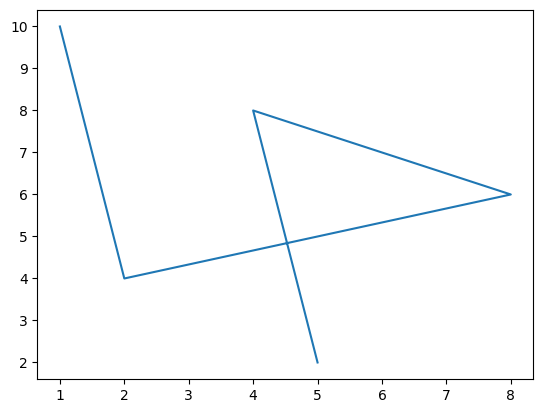

In [25]:
#47. Побудуй простий лінійний графік:   
x = [1, 2, 8, 4, 5]  
y = [10, 4, 6, 8, 2]  
plt.plot(x, y)  
plt.show() 

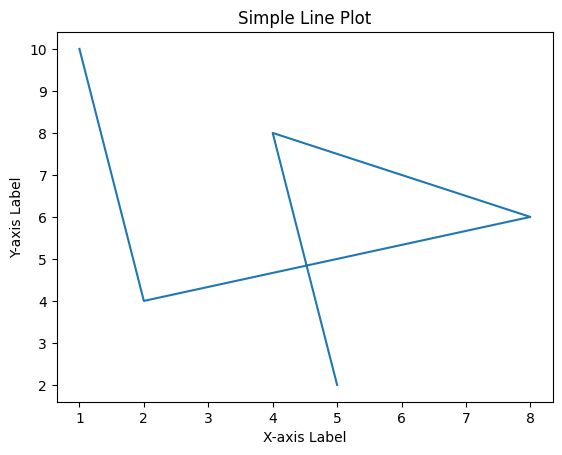

In [26]:
# 48. Додай підписи осей (`xlabel`, `ylabel`) і заголовок (`title`). 
plt.plot(x, y)  
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Simple Line Plot')
plt.show()

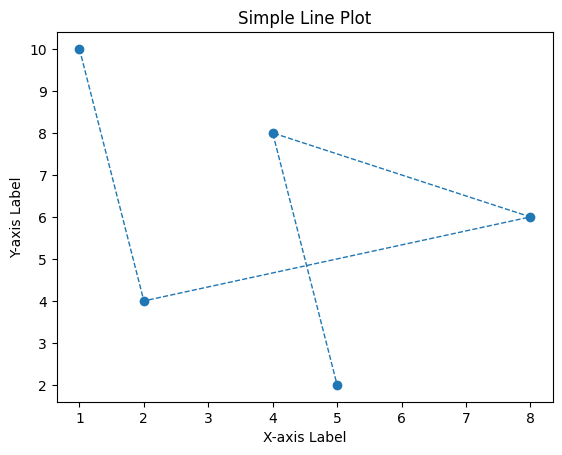

In [27]:
# 49. Змініть зовнішній вигляд лінії: стиль (`'--'`, `'-.'`), маркери (`'o'`, `'s'`), товщину (`linewidth`)
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Simple Line Plot')
plt.plot(x, y, linestyle='--', marker='o', linewidth=1)
plt.show()

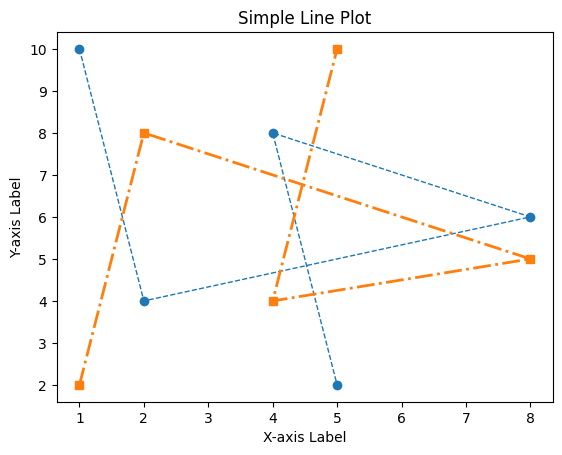

In [28]:
# 50. Побудуй **два графіки на одному полі** (додай другий виклик `plt.plot()` перед `plt.show()`).
x = [1, 2, 8, 4, 5]  
y1 = [10, 4, 6, 8, 2]  
y2 = [2, 8, 5, 4, 10]
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Simple Line Plot')
plt.plot(x, y1, linestyle='--', marker='o', linewidth=1)
plt.plot(x, y2, linestyle='-.', marker='s', linewidth=2)
plt.show()

## Розділ 8. Графіки з pandas + matplotlib
**Мета:** навчитися будувати графіки безпосередньо з DataFrame.

**Завдання 51–60:**
51. Створи DataFrame з продажами по місяцях: стовпці `"Month"`, `"Revenue"`.  
52. Побудуй лінійний графік `Revenue` по місяцях (`df.plot(x="Month", y="Revenue")`).  
53. Побудуй стовпчикову діаграму продажів по категоріях (`bar`).  
54. Побудуй горизонтальну стовпчикову діаграму (`barh`).  
55. Побудуй кругову діаграму (`pie`) для відсотку продажів по категоріях.  
56. Створи DataFrame з віком клієнтів і побудуй гістограму розподілу віку (`hist`).  
57. Побудуй `boxplot` для цін (`Price`).  
58. Побудуй `scatter plot` між `"Price"` і `"Quantity"`.  
59. Зміни стиль графіка (наприклад, `plt.style.use("ggplot")`).  
60. Додай підписи значень на стовпчиковому графіку (через `plt.text` або `ax.bar_label()`).  

In [29]:
month = ["January", "February", "March", "April", "May", "June",]
revenue = [3500, 5800, 4700, 4600, 4000, 3200]
df_revenue = pd.DataFrame({"Month": month, "Revenue": revenue})
df_revenue

,Month,Revenue
0,January,3500
1,February,5800
2,March,4700
3,April,4600
4,May,4000
5,June,3200


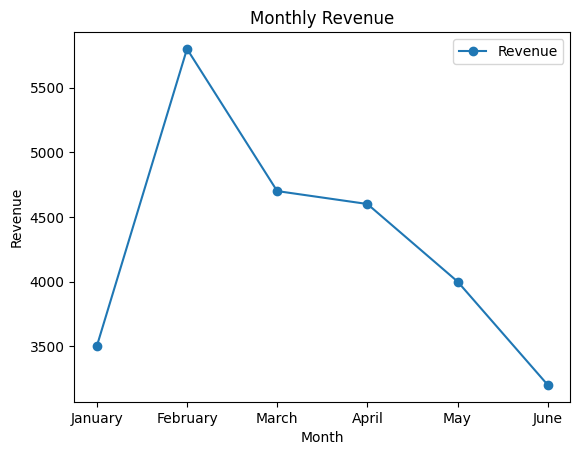

In [30]:
# 52. Побудуй лінійний графік `Revenue` по місяцях (`df.plot(x="Month", y="Revenue")`).  
df_revenue.plot(x="Month", y="Revenue", marker='o', linestyle='-')
plt.title('Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()

## Розділ 9. Комбіновані завдання (pandas + matplotlib)
**Мета:** поєднати обробку даних та візуалізацію.

**Завдання 61–70:**
61. Створи або зчитай з CSV DataFrame з даними про продажі: дата, товар, категорія, ціна, кількість, місто.  
62. Порахуйте загальний дохід по місяцях і побудуйте лінійний графік.  
63. Визнач топ-3 товари за продажами (за `Revenue`) і побудуй для них стовпчиковий графік.  
64. Побудуй порівняння доходів по містах (стовпчиковий графік).  
65. Обчисли кореляцію між числовими стовпцями (`df.corr()`) і побудуй `heatmap` (через `plt.imshow` або іншу бібліотеку).  
66. Побудуй `subplot` із двома графіками: лінійний (Revenue по місяцях) і стовпчиковий (Revenue по категоріях).  
67. Створи кілька серій даних (наприклад, Revenue за 2 роки) і побудуй їх разом на одному графіку з легендою.  
68. Побудуй графік із вторинною віссю (`twinx`): стовпчики для Revenue і лінія для середньої ціни.  
69. Збережи один із графіків у PNG-файл (`plt.savefig("sales_chart.png", dpi=300)`).  
70. Зроби зведену таблицю продажів по місяцях і побудуй її графік одразу з pandas (`pivot_table` + `.plot()`).  

In [31]:
# Розв'язання для завдань 61–70
# Твій код тут ↓